### Data Import and Library Inclusion
####  Inclusion of essential libraries such as Pandas, Numpy, Matplotlib, Seaborn, and the Warnings module.

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

#### Load the CSV file into a Pandas DataFrame.

In [140]:
df = pd.read_csv('StudentsPerformanceData.csv')

#### Display the First Five Entries

In [141]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Dataset Dimensions

In [142]:
df.shape

(1000, 8)

### Understanding the Dataset

#### Dataset Attributes Overview
- **gender**: Specifies the student's gender (Male/Female).
- **race/ethnicity**: Categorizes students into ethnic groups (Group A, B, C, D, E).
- **parental level of education**: Indicates the highest level of education attained by the student's parents (Bachelor's degree, Some college, Master's degree, Associate's degree, High school).
- **lunch**: Details about the lunch type taken before the test (Standard or Free/Reduced).
- **test preparation course**: Status of completion of a test preparation course (Completed or Not completed).
- **math score**: Numerical score achieved in the mathematics test.
- **reading score**: Numerical score achieved in the reading test.
- **writing score**: Numerical score achieved in the writing test.

### Data Checks to perform

1.Verify and handle missing values.
2.Identify and address duplicate records.
3.Inspect and manage data types.
4.Examine the number of unique values in each column.
5.Analyze the statistical summary of the dataset.
6Explore the distinct categories within categorical columns.

### Check Missing values

In [143]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

#### There are no missing values in the data set

### Verify and handle missing values

In [144]:
df.duplicated().sum()

0

#### There are no duplicates  values in the data set

### Check data types

In [145]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


### 3.4 Checking the number of unique values of each column

In [146]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

### 3.5 Check statistics of data set

In [147]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#### Insight
Insights from the numerical data description:

The means for all numerical variables are quite similar, ranging from approximately 66 to 68.05.
The standard deviations for these variables are also closely clustered, varying from about 14.6 to 15.19.
Notably, the minimum score for the math variable is 0, indicating the presence of students with the lowest possible score. In contrast, the minimum score for writing is significantly higher at 10, and for reading, it's even higher at 17.
These insights provide valuable information about the distribution and characteristics of the numerical data in the dataset.

### Data Exploration

In [148]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [149]:
# Step 1: Distinct values for 'gender'
unique_genders = df['gender'].unique()
print(f"Distinct values for 'gender': {unique_genders}")

# Step 2: Distinct values for 'race_ethnicity'
unique_ethnicities = df['race_ethnicity'].unique()
print(f"Distinct values for 'race_ethnicity': {unique_ethnicities}")

# Step 3: Distinct values for 'parental level of education'
unique_education_levels = df['parental_level_of_education'].unique()
print(f"Distinct values for 'parental level of education': {unique_education_levels}")

# Step 4: Distinct values for 'lunch'
unique_lunches = df['lunch'].unique()
print(f"Distinct values for 'lunch': {unique_lunches}")

# Step 5: Distinct values for 'test preparation course'
unique_test_preparation_courses = df['test_preparation_course'].unique()
print(f"Distinct values for 'test preparation course': {unique_test_preparation_courses}")


Distinct values for 'gender': ['female' 'male']
Distinct values for 'race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
Distinct values for 'parental level of education': ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Distinct values for 'lunch': ['standard' 'free/reduced']
Distinct values for 'test preparation course': ['none' 'completed']


In [150]:
# Step 1: Identify numeric and categorical columns
numeric_columns = [col for col in df.columns if df[col].dtype != 'object']
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

# Step 2: Display the identified numeric columns
print(f'Numeric columns ({len(numeric_columns)}): {numeric_columns}')

# Step 3: Display the identified categorical columns
print(f'Categorical columns ({len(categorical_columns)}): {categorical_columns}')


Numeric columns (3): ['math_score', 'reading_score', 'writing_score']
Categorical columns (5): ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [151]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


### "Total Score" and "Average" columns have been added

In [152]:
# Calculate the total score for each student as the sum of math, reading, and writing scores
df['Total Score'] = df['math_score'] + df['reading_score'] + df['writing_score']

# Calculate the average score for each student as the mean of math, reading, and writing scores
df['Average'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1)

# Display the first few rows of the DataFrame after updating
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total Score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [153]:
# Count students with perfect scores in each subject
perfect_reading_count = df[df['reading_score'] == 100]['Average'].count()
perfect_writing_count = df[df['writing_score'] == 100]['Average'].count()
perfect_math_count = df[df['math_score'] == 100]['Average'].count()

# Display the counts for each subject
print(f'Total students with a perfect score in Math: {perfect_math_count}')
print(f'Total students with a perfect score in Writing: {perfect_writing_count}')
print(f'Total students with a perfect score in Reading: {perfect_reading_count}')


Total students with a perfect score in Math: 7
Total students with a perfect score in Writing: 14
Total students with a perfect score in Reading: 17


In [154]:
# Count students with scores 20 or below in each subject
low_reading_count = df[df['reading_score'] <= 20]['Average'].count()
low_writing_count = df[df['writing_score'] <= 20]['Average'].count()
low_math_count = df[df['math_score'] <= 20]['Average'].count()

# Display the counts for low scores in each subject
print(f'Students scoring 20 or below in Math: {low_math_count}')
print(f'Students scoring 20 or below in Writing: {low_writing_count}')
print(f'Students scoring 20 or below in Reading: {low_reading_count}')


Students scoring 20 or below in Math: 4
Students scoring 20 or below in Writing: 3
Students scoring 20 or below in Reading: 1


### Exploring Data ( Visualization )


#### Histogram & KDE

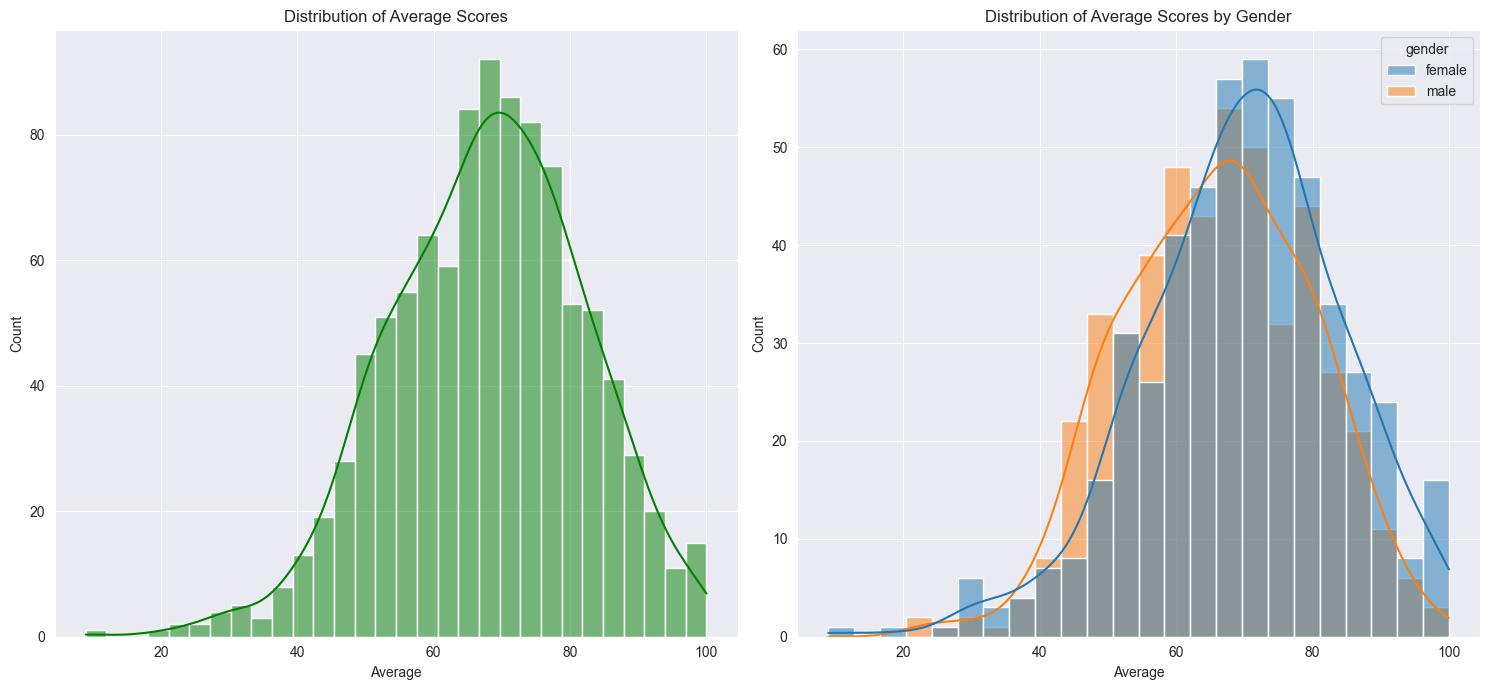

In [155]:
# Initialize the figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plot the distribution of average scores on the left subplot
sns.histplot(data=df, x='Average', bins=30, kde=True, color='g', ax=axes[0])
axes[0].set_title('Distribution of Average Scores')

# Plot the distribution of average scores split by gender on the right subplot
sns.histplot(data=df, x='Average', kde=True, hue='gender', ax=axes[1])
axes[1].set_title('Distribution of Average Scores by Gender')

# Display the plots
plt.tight_layout()
plt.show()


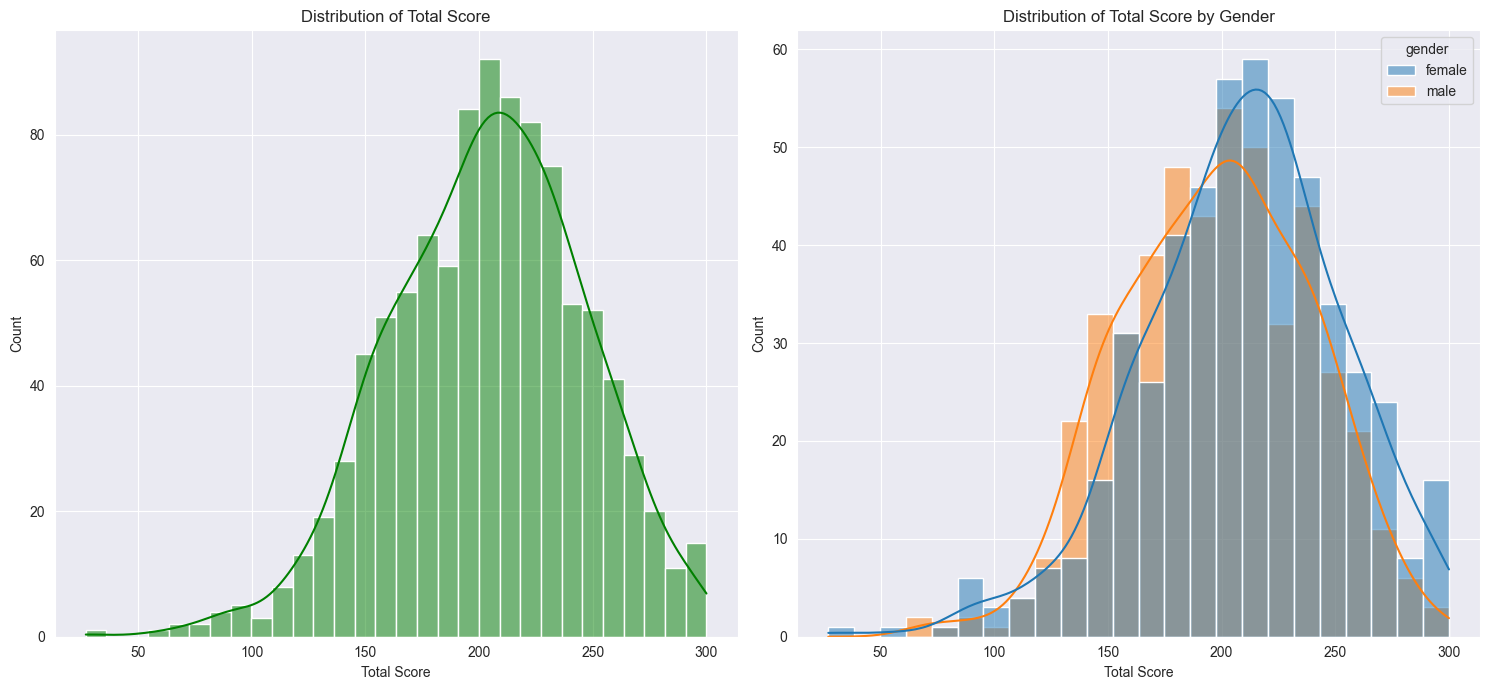

In [156]:
# Setting up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Plotting the distribution of 'Total Score' on the left
sns.histplot(data=df, x='Total Score', bins=30, kde=True, color='g', ax=axes[0])
axes[0].set_title('Distribution of Total Score')

# Plotting the 'Total Score' distribution segmented by gender on the right
sns.histplot(data=df, x='Total Score', kde=True, hue='gender', ax=axes[1])
axes[1].set_title('Distribution of Total Score by Gender')

# Displaying the plots
plt.tight_layout()
plt.show()


#####  Insights
- Female students tend to perform well then male students.

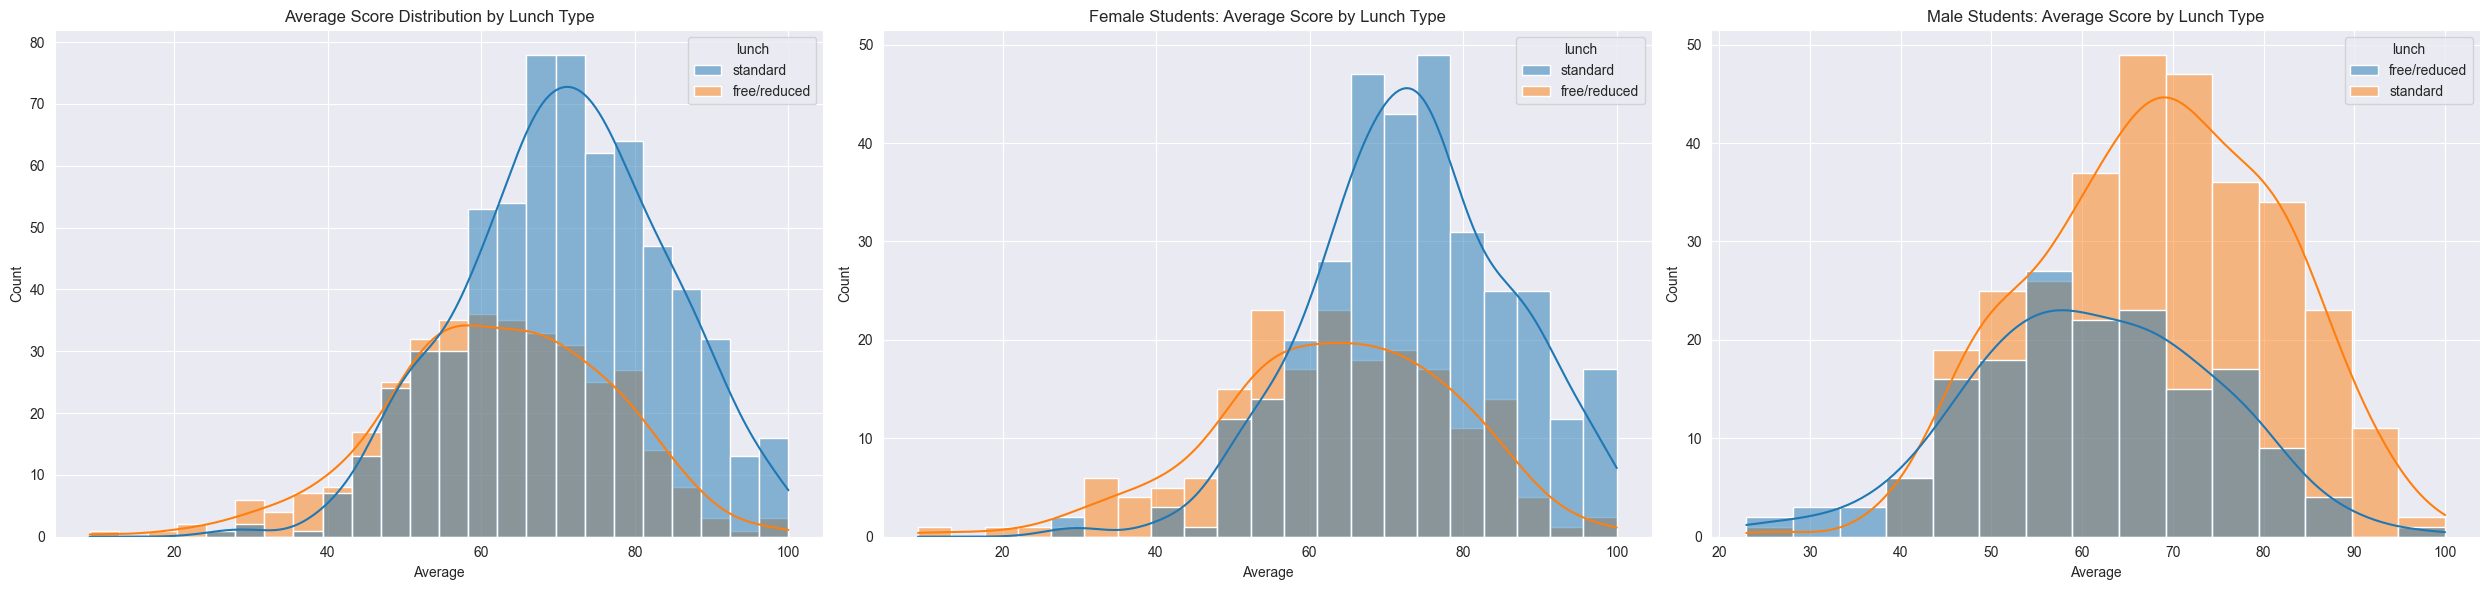

In [157]:
# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plotting the distribution of 'Average' scores segmented by 'lunch' for all students
sns.histplot(data=df, x='Average', kde=True, hue='lunch', ax=axes[0])
axes[0].set_title('Average Score Distribution by Lunch Type')

# Plotting the distribution of 'Average' scores for female students segmented by 'lunch'
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='lunch', ax=axes[1])
axes[1].set_title('Female Students: Average Score by Lunch Type')

# Plotting the distribution of 'Average' scores for male students segmented by 'lunch'
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='lunch', ax=axes[2])
axes[2].set_title('Male Students: Average Score by Lunch Type')

# Display the plots
plt.tight_layout()
plt.show()


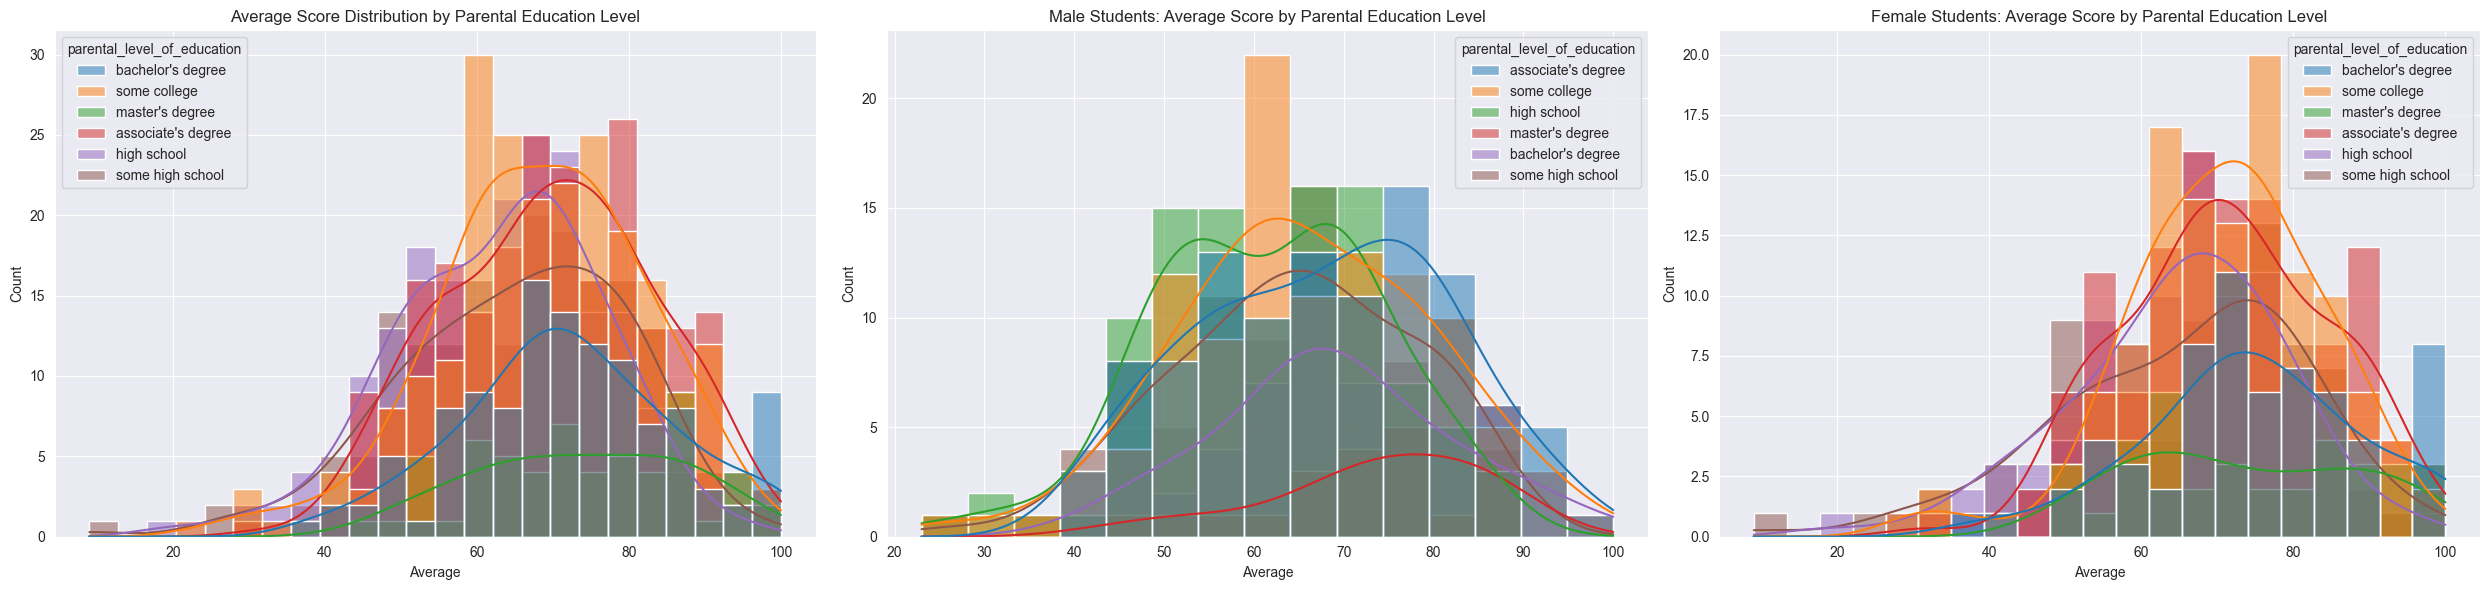

In [158]:
# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plotting the distribution of 'Average' scores for all students, segmented by 'parental_level_of_education'
sns.histplot(data=df, x='Average', kde=True, hue='parental_level_of_education', ax=axes[0])
axes[0].set_title('Average Score Distribution by Parental Education Level')

# Plotting the distribution of 'Average' scores for male students, segmented by 'parental_level_of_education'
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='parental_level_of_education', ax=axes[1])
axes[1].set_title('Male Students: Average Score by Parental Education Level')

# Plotting the distribution of 'Average' scores for female students, segmented by 'parental_level_of_education'
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='parental_level_of_education', ax=axes[2])
axes[2].set_title('Female Students: Average Score by Parental Education Level')

# Display the plots
plt.tight_layout()
plt.show()


#####  Insights
- In general parent's education don't help student perform well in exam.
- 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
- 3rd plot we can see there is no effect of parent's education on female students.

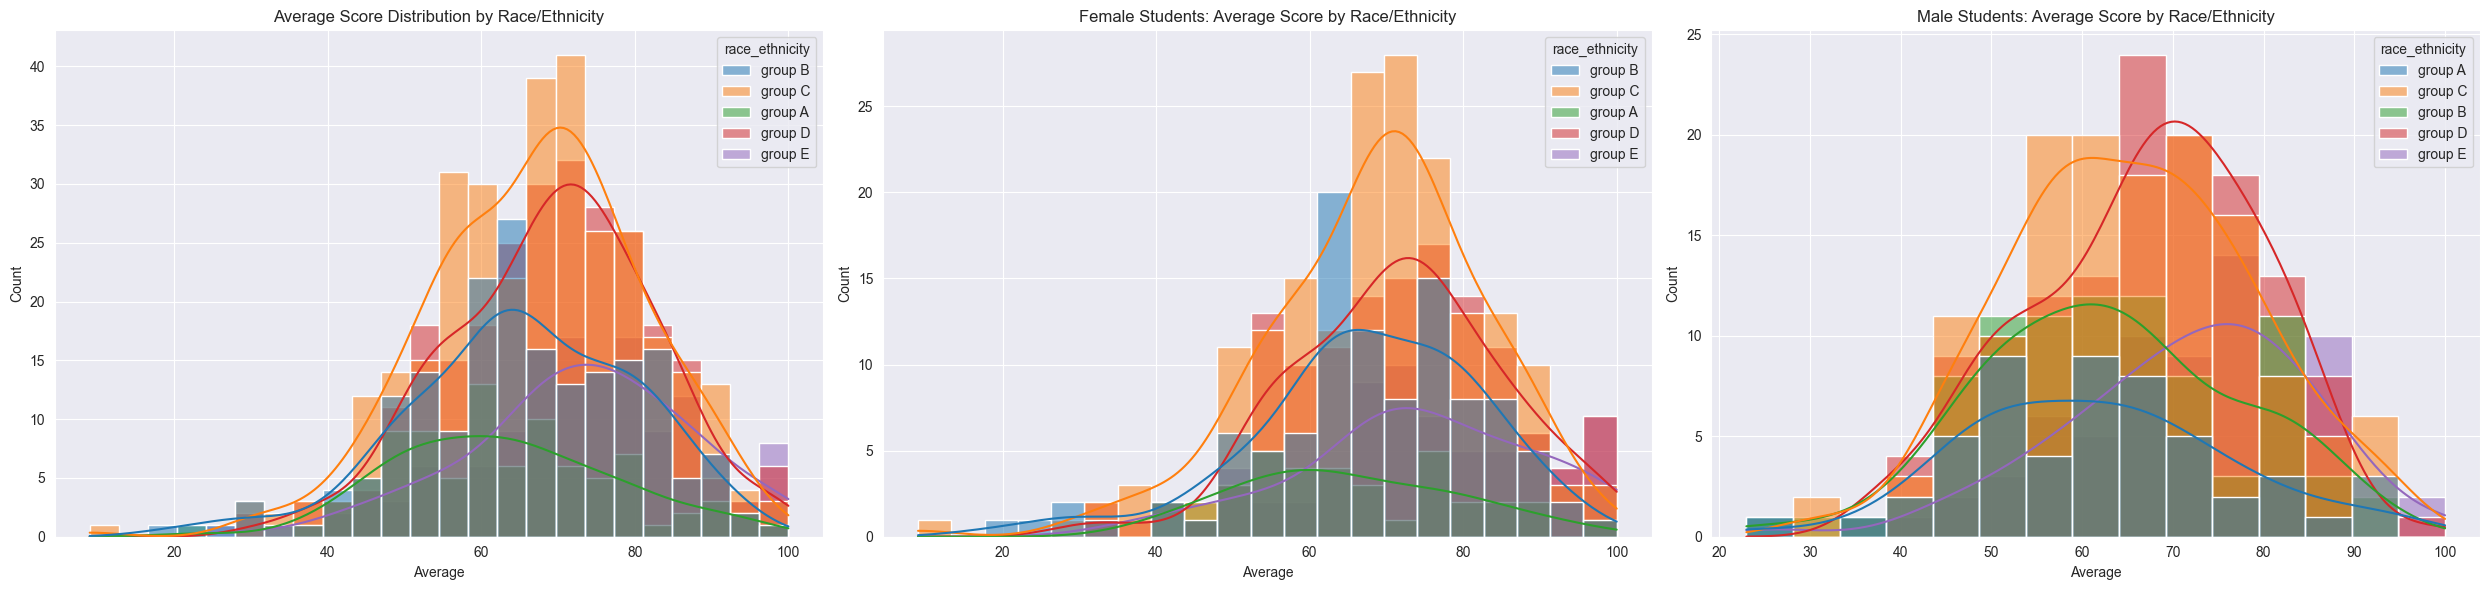

In [159]:
# Set up the figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(25, 6))

# Plotting the distribution of 'Average' scores for all students, segmented by 'race_ethnicity'
sns.histplot(data=df, x='Average', kde=True, hue='race_ethnicity', ax=axes[0])
axes[0].set_title('Average Score Distribution by Race/Ethnicity')

# Plotting the distribution of 'Average' scores for female students, segmented by 'race_ethnicity'
sns.histplot(data=df[df.gender == 'female'], x='Average', kde=True, hue='race_ethnicity', ax=axes[1])
axes[1].set_title('Female Students: Average Score by Race/Ethnicity')

# Plotting the distribution of 'Average' scores for male students, segmented by 'race_ethnicity'
sns.histplot(data=df[df.gender == 'male'], x='Average', kde=True, hue='race_ethnicity', ax=axes[2])
axes[2].set_title('Male Students: Average Score by Race/Ethnicity')

# Display the plots
plt.tight_layout()
plt.show()


####  Maximumum score of students in all three subjects

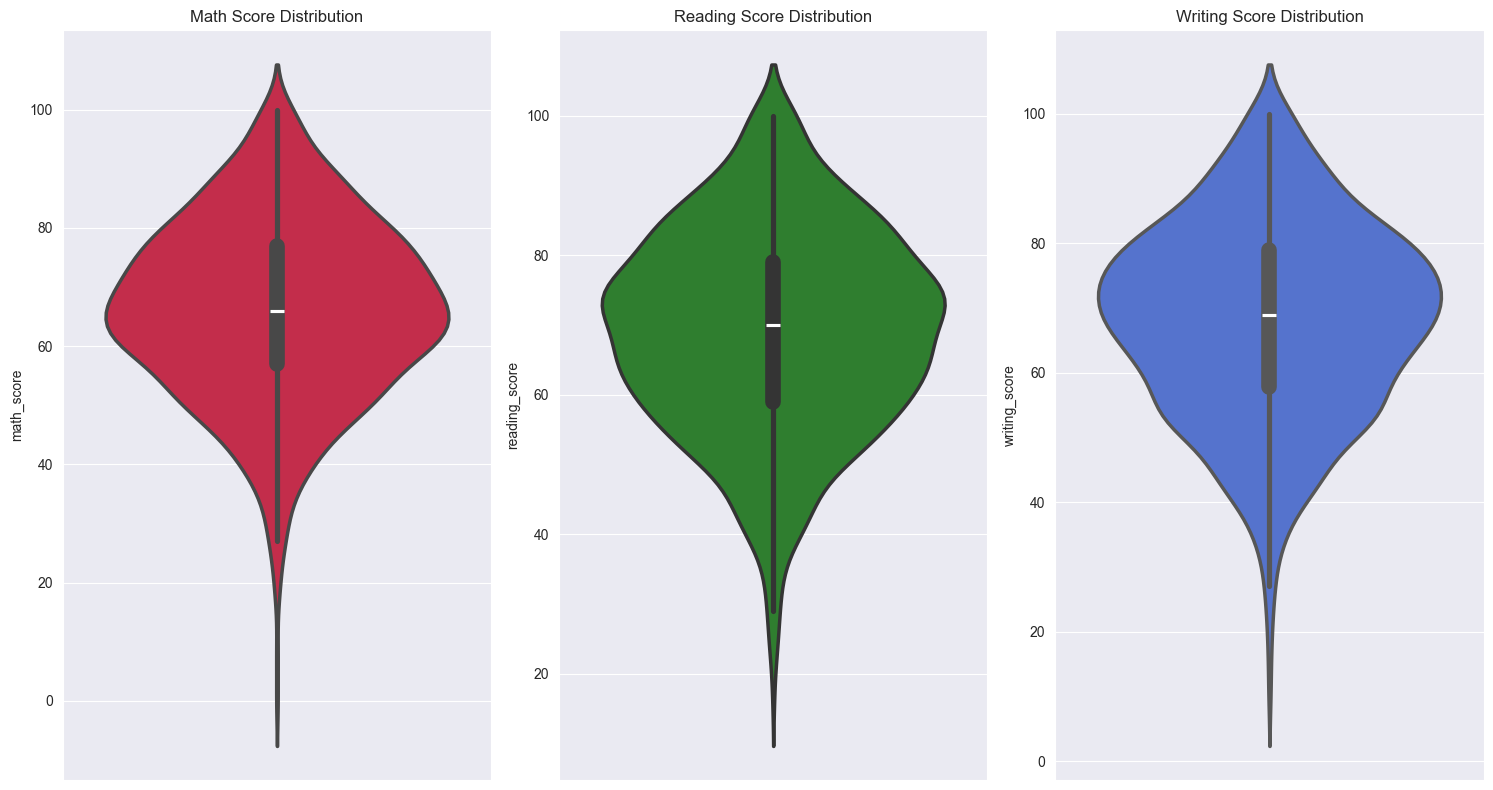

In [160]:
plt.figure(figsize=(20, 8))

# Plot for Math Scores
plt.subplot(1, 4, 1)
sns.violinplot(y='math_score', data=df, color='crimson', linewidth=2.5)
plt.title('Math Score Distribution')

# Plot for Reading Scores
plt.subplot(1, 4, 2)
sns.violinplot(y='reading_score', data=df, color='forestgreen', linewidth=2.5)
plt.title('Reading Score Distribution')

# Plot for Writing Scores
plt.subplot(1, 4, 3)
sns.violinplot(y='writing_score', data=df, color='royalblue', linewidth=2.5)
plt.title('Writing Score Distribution')

plt.tight_layout()
plt.show()


#### 4.3 Multivariate analysis using pieplot

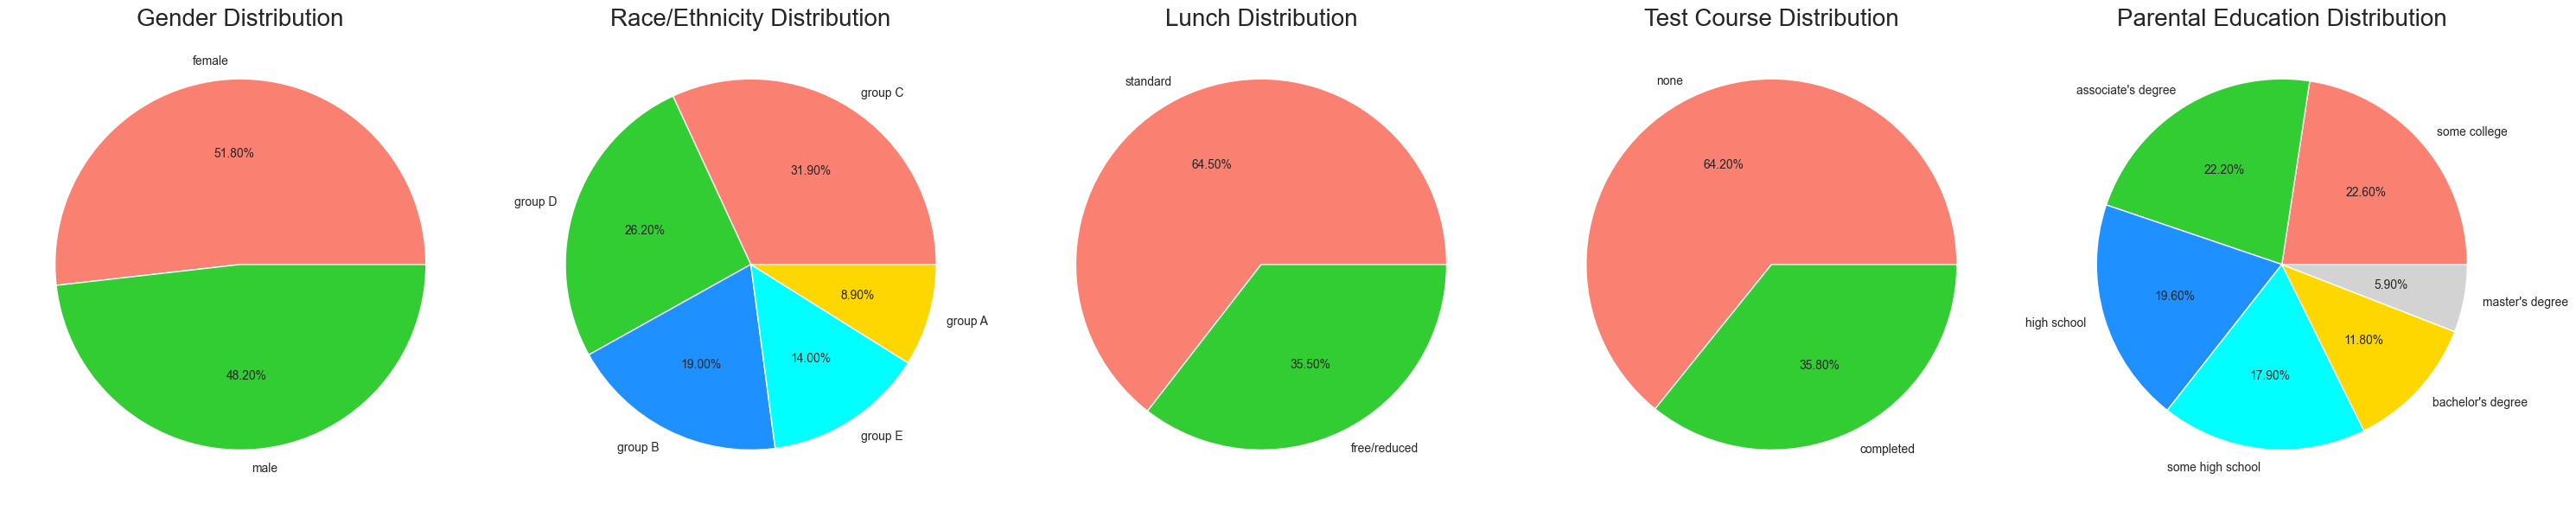

In [161]:
plt.rcParams['figure.figsize'] = (30, 12)

# Gender Pie Chart
plt.subplot(1, 5, 1)
gender_counts = df['gender'].value_counts()
gender_colors = ['salmon', 'limegreen']
gender_labels = gender_counts.index

plt.pie(gender_counts, colors=gender_colors, labels=gender_labels, autopct='%.2f%%')
plt.title('Gender Distribution', fontsize=20)
plt.axis('off')

# Race/Ethnicity Pie Chart
plt.subplot(1, 5, 2)
race_counts = df['race_ethnicity'].value_counts()
race_colors = ['salmon', 'limegreen', 'dodgerblue', 'cyan', 'gold']
race_labels = race_counts.index

plt.pie(race_counts, colors=race_colors, labels=race_labels, autopct='%.2f%%')
plt.title('Race/Ethnicity Distribution', fontsize=20)
plt.axis('off')

# Lunch Pie Chart
plt.subplot(1, 5, 3)
lunch_counts = df['lunch'].value_counts()
lunch_colors = ['salmon', 'limegreen']
lunch_labels = lunch_counts.index

plt.pie(lunch_counts, colors=lunch_colors, labels=lunch_labels, autopct='%.2f%%')
plt.title('Lunch Distribution', fontsize=20)
plt.axis('off')

# Test Preparation Course Pie Chart
plt.subplot(1, 5, 4)
course_counts = df['test_preparation_course'].value_counts()
course_colors = ['salmon', 'limegreen']
course_labels = course_counts.index

plt.pie(course_counts, colors=course_colors, labels=course_labels, autopct='%.2f%%')
plt.title('Test Course Distribution', fontsize=20)
plt.axis('off')

# Parental Level of Education Pie Chart
plt.subplot(1, 5, 5)
education_counts = df['parental_level_of_education'].value_counts()
education_colors = ['salmon', 'limegreen', 'dodgerblue', 'cyan', 'gold', 'lightgrey']
education_labels = education_counts.index

plt.pie(education_counts, colors=education_colors, labels=education_labels, autopct='%.2f%%')
plt.title('Parental Education Distribution', fontsize=20)
plt.axis('off')

# Display the plots
plt.tight_layout()
plt.show()


#### Feature Wise Visualization


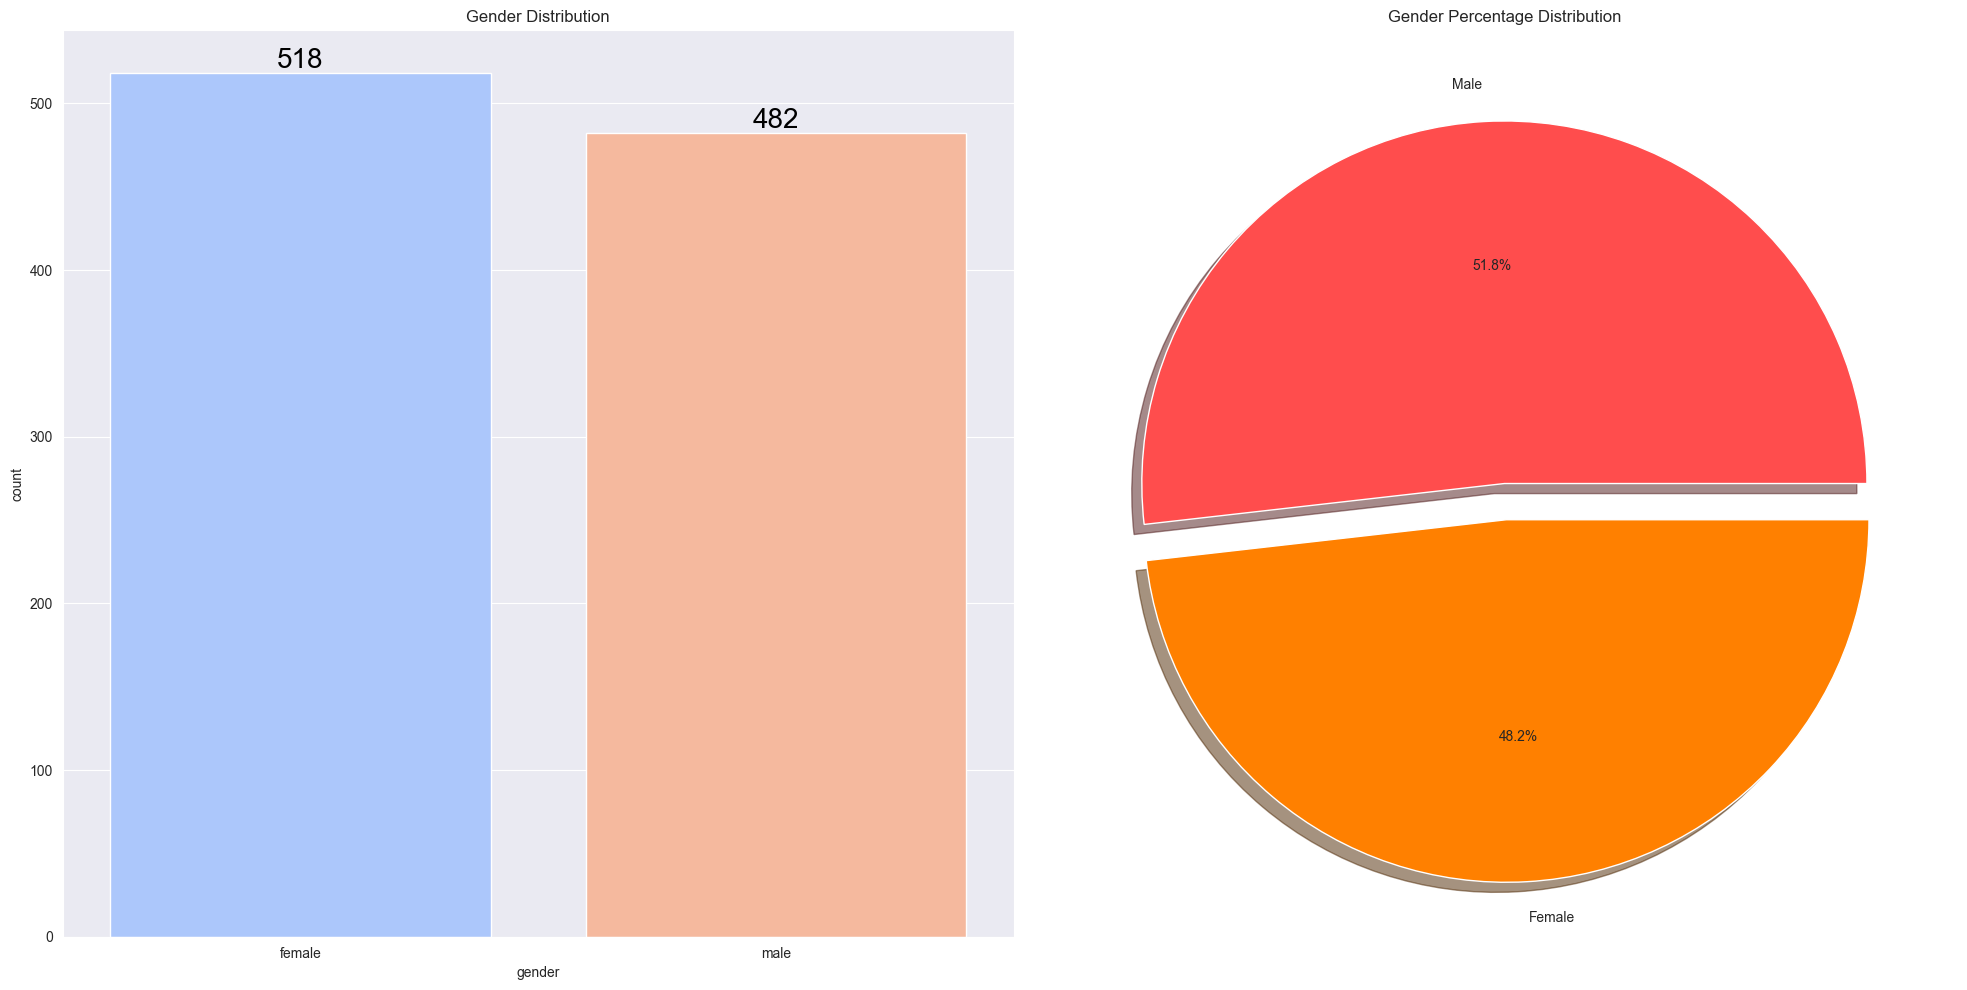

In [162]:
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Countplot for gender distribution
sns.countplot(x=df['gender'], data=df, palette='coolwarm', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)
ax[0].set_title("Gender Distribution")

# Pie chart for percentage distribution
ax[1].pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], 
          explode=[0, 0.1], autopct='%1.1f%%', shadow=True, 
          colors=['#ff4d4d', '#ff8000'])
ax[1].set_title("Gender Percentage Distribution")

plt.tight_layout()
plt.show()


#### Insights 
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%) 

#### BIVARIATE ANALYSIS ( Is gender has any impact on student's performance ? ) 

In [163]:
gender_group = df.groupby('gender').mean()
gender_group

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
# Step 1: Create the 'total score' column by adding math, reading, and writing scores
df['total score'] = df['math_score'] + df['reading_score'] + df['writing_score']

# Step 2: Create the 'average' column by dividing the total score by 3
df['average'] = df['total score'] / 3

# Step 3: Plot the grouped bar chart for total average and math average marks by gender
# Grouping the DataFrame by 'gender' and calculating the mean for each gender
gender_group = df.groupby('gender').mean()

# Setting up the figure and defining the data for plotting
plt.figure(figsize=(10, 8))
X = ['Total Average', 'Math Average']
female_scores = [gender_group.loc['female', 'average'], gender_group.loc['female', 'math_score']]
male_scores = [gender_group.loc['male', 'average'], gender_group.loc['male', 'math_score']]
X_axis = np.arange(len(X))

# Creating grouped bar chart with labels and colors
plt.bar(X_axis - 0.2, male_scores, 0.4, label='Male', color='blue')
plt.bar(X_axis + 0.2, female_scores, 0.4, label='Female', color='pink')

# Adding labels and title to the plot
plt.xticks(X_axis, X)
plt.ylabel("Marks")
plt.title("Total Average vs. Math Average Marks by Gender", fontweight='bold')
plt.legend()

# Display the plot
plt.show()


#### RACE/EHNICITY COLUMN


#### UNIVARIATE ANALYSIS ( How is Group wise distribution ?)

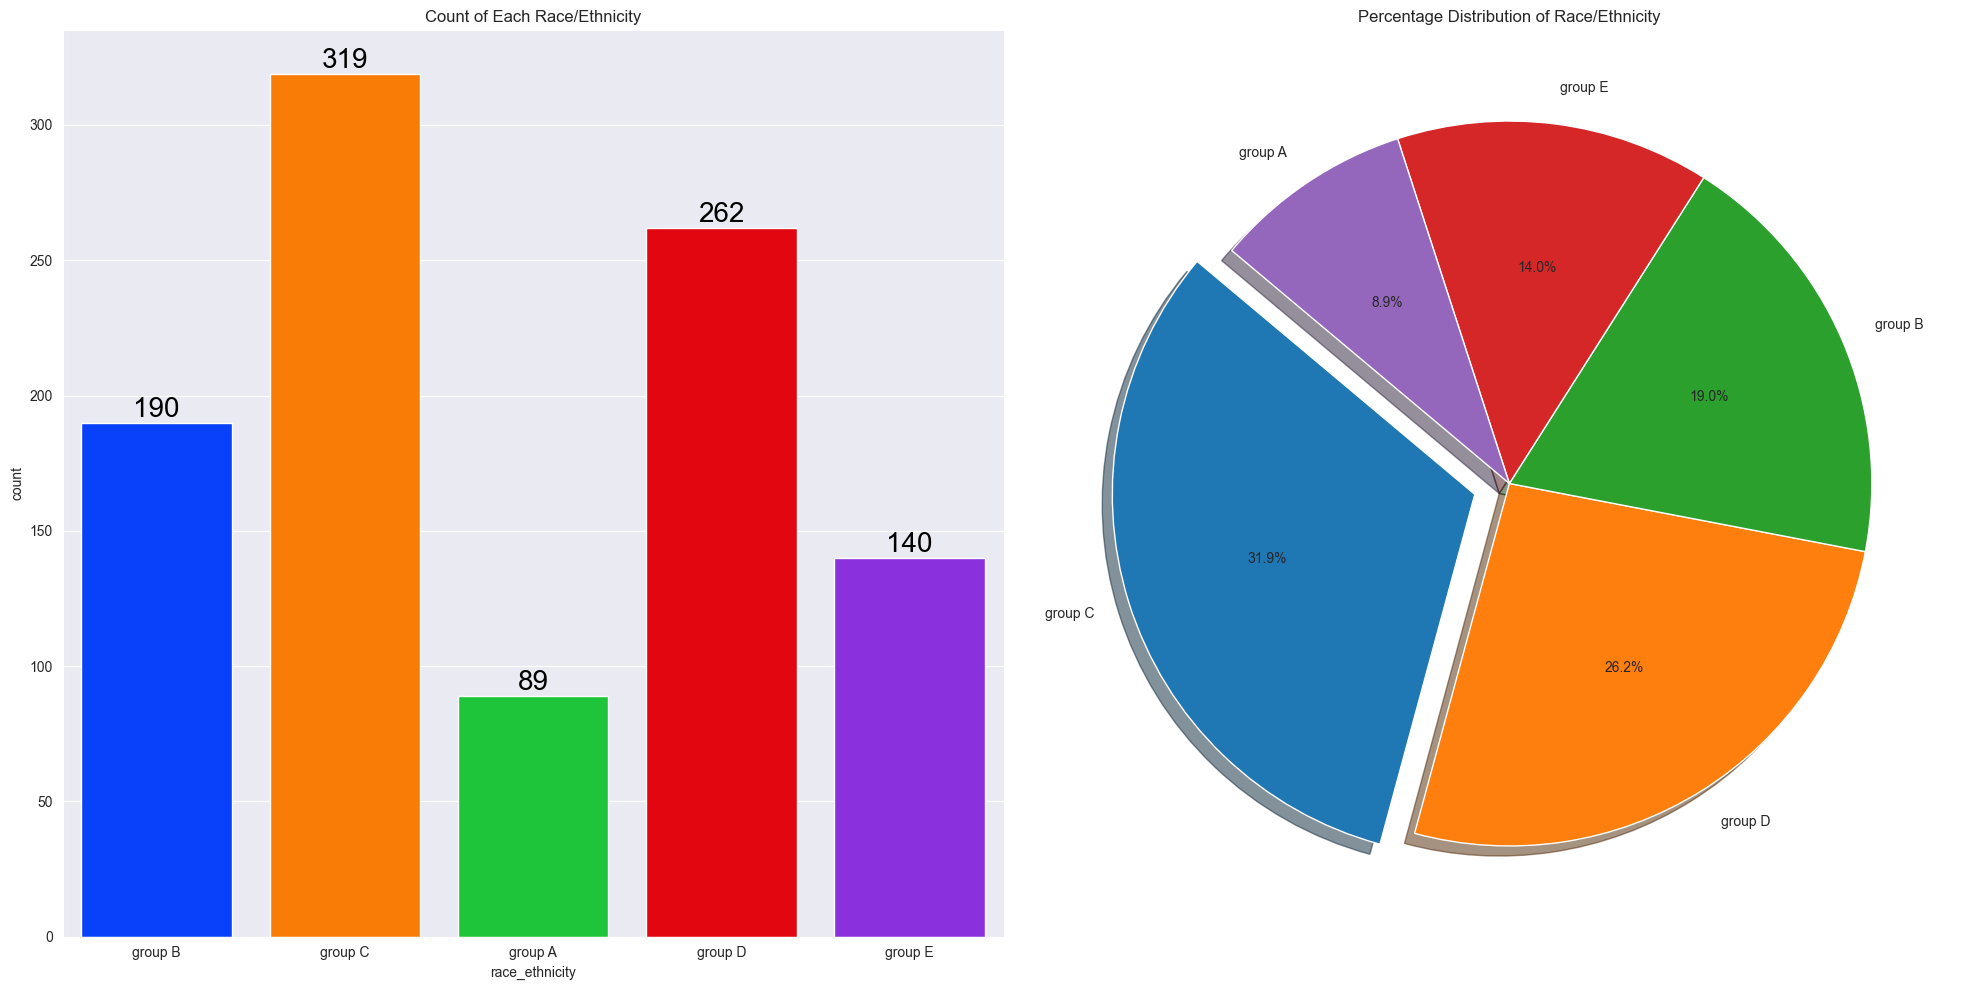

In [164]:
# Initialize the figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Step 1: Create a countplot for 'race/ethnicity'
sns.countplot(x=df['race_ethnicity'], data=df, palette='bright', ax=ax[0], saturation=0.95)

# Add labels to the bars in the countplot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Set the title for the countplot
ax[0].set_title('Count of Each Race/Ethnicity')

# Step 2: Create a pie chart for the same data
labels = df['race_ethnicity'].value_counts().index
sizes = df['race_ethnicity'].value_counts()
explode = [0.1, 0, 0, 0, 0]

# Create the pie chart with labels, explode, percentage formatting, and shadow
ax[1].pie(sizes, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)

# Set the title for the pie chart
ax[1].set_title('Percentage Distribution of Race/Ethnicity')

# Display the plots
plt.tight_layout()
plt.show()


#### Insights 
- Most of the student belonging from group C /group D.
- Lowest number of students belong to groupA.

#### BIVARIATE ANALYSIS ( Is Race/Ehnicity has any impact on student's performance ? )

In [ ]:
# Group the dataframe by 'race/ethnicity'
Group_data2 = df.groupby('race_ethnicity')

# Create a subplot layout
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plotting average Math scores by race/ethnicity
sns.barplot(x=Group_data2['math_score'].mean().index, 
            y=Group_data2['math_score'].mean().values, 
            palette='mako', ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

# Plotting average Reading scores by race/ethnicity
sns.barplot(x=Group_data2['reading_score'].mean().index, 
            y=Group_data2['reading_score'].mean().values, 
            palette='flare', ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

# Plotting average Writing scores by race/ethnicity
sns.barplot(x=Group_data2['writing_score'].mean().index, 
            y=Group_data2['writing_score'].mean().values, 
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)
for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

# Display the plots
plt.tight_layout()
plt.show()


#### UNIVARIATE ANALYSIS ( What is educational background of student's parent ? )

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 9))

# Set the style of the visualization
plt.style.use('fivethirtyeight')

# Create a count plot of the 'parental level of education' column
sns.countplot(x='parental_level_of_education', data=df, palette='Blues')

# Set the title and labels of the plot
plt.title('Comparison of Parental Education Levels', fontsize=20, fontweight=30)
plt.xlabel('Educational Degree')
plt.ylabel('Number of Students')

# Display the plot
plt.show()


#### BIVARIATE ANALYSIS ( Is parental education has any impact on student's performance ? )

In [ ]:
# Group the data by 'parental level of education' and compute the mean for each group
grouped_data = df.groupby('parental_level_of_education').mean()

# Create a horizontal bar plot of the grouped data
grouped_data.plot(kind='barh', figsize=(10, 10))

# Set the position of the legend outside the plot area
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Display the plot
plt.show()


#### 4.4.4 LUNCH COLUMN 
- Which type of lunch is most common amoung students ?
- What is the effect of lunch type on test results?


#### UNIVARIATE ANALYSIS ( Which type of lunch is most common amoung students ? )

In [ ]:
# Set the figure size and style for the plot
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')

# Create a countplot for the 'lunch' column
sns.countplot(x=df['lunch'], palette='PuBu')

# Set the title, x-label, and y-label for the plot
plt.title('Comparison of different types of lunch', fontweight=30, fontsize=20)
plt.xlabel('Types of lunch')
plt.ylabel('Count')

# Display the plot
plt.show()


#### Insights 
- Students being served Standard lunch was more than free lunch

#### BIVARIATE ANALYSIS (  Is lunch type intake has any impact on student's performance ? )

In [ ]:
# Setting up the figure with two subplots
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# First subplot: Countplot showing the distribution of 'parental level of education' 
# segmented by 'test preparation course'
sns.countplot(x=df['parental_level_of_education'], 
              data=df, 
              palette='bright', 
              hue='test_preparation_course', 
              saturation=0.95, 
              ax=ax[0])
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)

# Adding labels to the bars in the first subplot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Second subplot: Countplot showing the distribution of 'parental level of education' 
# segmented by 'lunch'
sns.countplot(x=df['parental_level_of_education'], 
              data=df, 
              palette='bright', 
              hue='lunch', 
              saturation=0.95, 
              ax=ax[1])

# Adding labels to the bars in the second subplot
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

# Displaying the plots
plt.tight_layout()
plt.show()


#### Insights 
- Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN 
- Which type of lunch is most common amoung students ?
- Is Test prepration course has any impact on student's performance ?

#### BIVARIATE ANALYSIS ( Is Test prepration course has any impact on student's performance ? )

In [ ]:
# Setting the figure size for the entire grid
plt.figure(figsize=(12, 6))

# First subplot (Top-left): Bar plot comparing 'lunch' type with 'math score', segmented by 'test preparation course'
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math_score'], hue=df['test_preparation_course'])
plt.title('Math Scores by Lunch Type')

# Second subplot (Top-right): Bar plot comparing 'lunch' type with 'reading score', segmented by 'test preparation course'
plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.title('Reading Scores by Lunch Type')

# Third subplot (Bottom-left): Bar plot comparing 'lunch' type with 'writing score', segmented by 'test preparation course'
plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing_score'], hue=df['test_preparation_course'])
plt.title('Writing Scores by Lunch Type')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


#### Insights  
- Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

#### 4.4.6 CHECKING OUTLIERS

KeyError: 'total score'

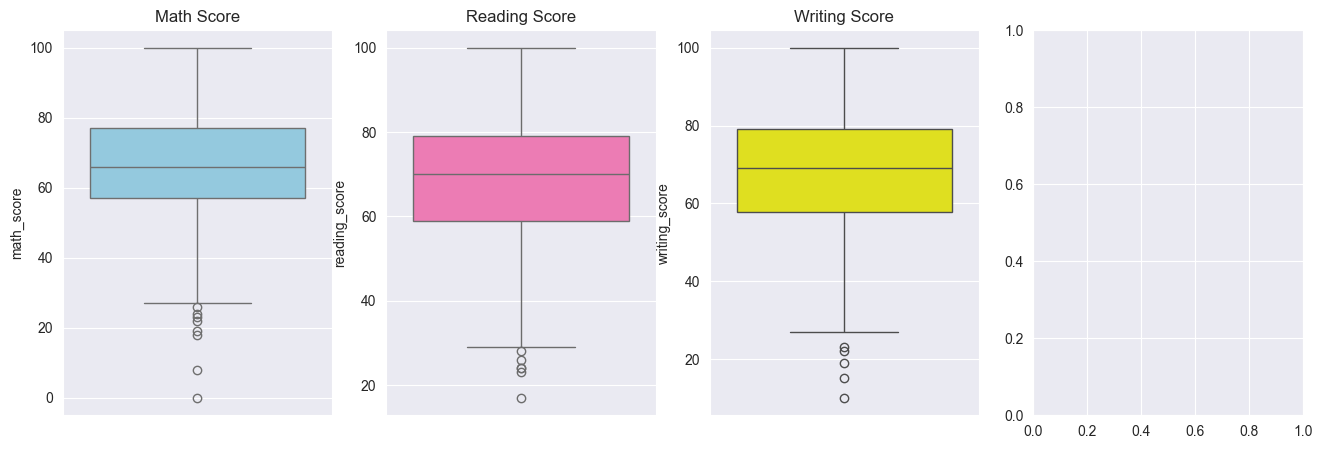

In [166]:
# Step 1: Create a figure with four subplots in a 1x4 grid and set the overall figure size
plt.subplots(1, 4, figsize=(16, 5))

# Step 2: Create the first subplot (from the left) - Box plot for 'math score'
plt.subplot(1, 4, 1)
sns.boxplot(y=df['math_score'], color='skyblue')
plt.title('Math Score')  # Add a title to the subplot

# Step 3: Create the second subplot - Box plot for 'reading score'
plt.subplot(1, 4, 2)
sns.boxplot(y=df['reading_score'], color='hotpink')
plt.title('Reading Score')  # Add a title to the subplot

# Step 4: Create the third subplot - Box plot for 'writing score'
plt.subplot(1, 4, 3)
sns.boxplot(y=df['writing_score'], color='yellow')
plt.title('Writing Score')  # Add a title to the subplot

# Step 5: Create the fourth subplot - Box plot for 'total score'
plt.subplot(1, 4, 4)
sns.boxplot(y=df['total score'], color='lightgreen')
plt.title('Total Score')  # Add a title to the subplot

# Step 6: Adjust the layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

#### 4.4.7 MUTIVARIATE ANALYSIS USING PAIRPLOT

In [ ]:
sns.pairplot(df,hue = 'gender')
plt.show()